In [126]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [127]:
df=pd.read_csv('/content/loan_approval_dataset.csv')

In [128]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [129]:
df = df.drop('loan_id', axis=1)


In [130]:
df.isnull().sum()


,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [131]:
df.duplicated().sum()


np.int64(0)

In [132]:
df["DTI"] = df[" loan_amount"] / df[" income_annum"]
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,DTI
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,3.114583
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,2.975610
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,3.263736
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,3.743902
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,2.469388


In [133]:
print(df.columns.tolist())


[' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status', 'DTI']


In [134]:
cat_cols = df.select_dtypes(include='object').columns
le=LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [135]:
x = df.drop(" loan_status", axis=1)
y = df[" loan_status"]

In [136]:
y.value_counts()

,count
loan_status,
0,2656
1,1613


In [137]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, y)

In [138]:
y_resampled.value_counts()

,count
loan_status,
0,2656
1,2656


In [139]:
X_train, X_test, y_train, y_test = train_test_split( x_resampled, y_resampled, test_size=0.3, random_state=42)


In [140]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [141]:
print("Preprocessing completed successfully!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Preprocessing completed successfully!
X_train shape: (3718, 12)
X_test shape: (1594, 12)


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_model_1 = LogisticRegression(penalty='l1',solver='liblinear')
lr_model_2 = LogisticRegression(penalty='l2')
lr_model_1.fit(X_train, y_train)
lr_model_2.fit(X_train, y_train)

y_pred_lr_1 = lr_model_1.predict(X_test)
y_pred_lr_2 = lr_model_2.predict(X_test)
print("Logistic Regression Accuracy with penality l1:", accuracy_score(y_test, y_pred_lr_1))
print("Logistic Regression Accuracy with penality l2:", accuracy_score(y_test, y_pred_lr_2))


Logistic Regression Accuracy with penality l1: 0.9228356336260979
Logistic Regression Accuracy with penality l2: 0.9222082810539524


              precision    recall  f1-score   support

           0       0.93      0.92      0.92       777
           1       0.92      0.93      0.93       817

    accuracy                           0.92      1594
   macro avg       0.92      0.92      0.92      1594
weighted avg       0.92      0.92      0.92      1594



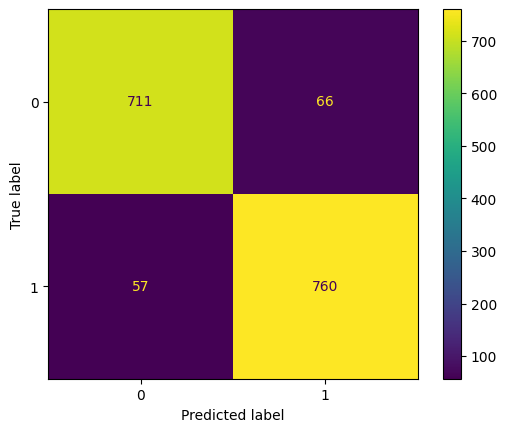

In [143]:
print(classification_report(y_test,y_pred_lr_1))
cm=confusion_matrix(y_test,y_pred_lr_1)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [144]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=2)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.965495608531995


              precision    recall  f1-score   support

           0       0.99      0.94      0.96       777
           1       0.95      0.99      0.97       817

    accuracy                           0.97      1594
   macro avg       0.97      0.96      0.97      1594
weighted avg       0.97      0.97      0.97      1594



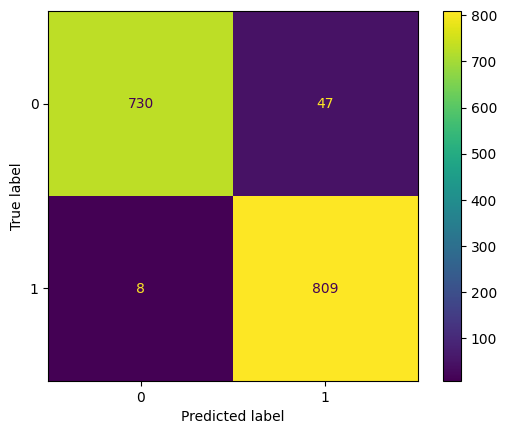

In [145]:
print(classification_report(y_test,y_pred_dt))
cm=confusion_matrix(y_test,y_pred_dt)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

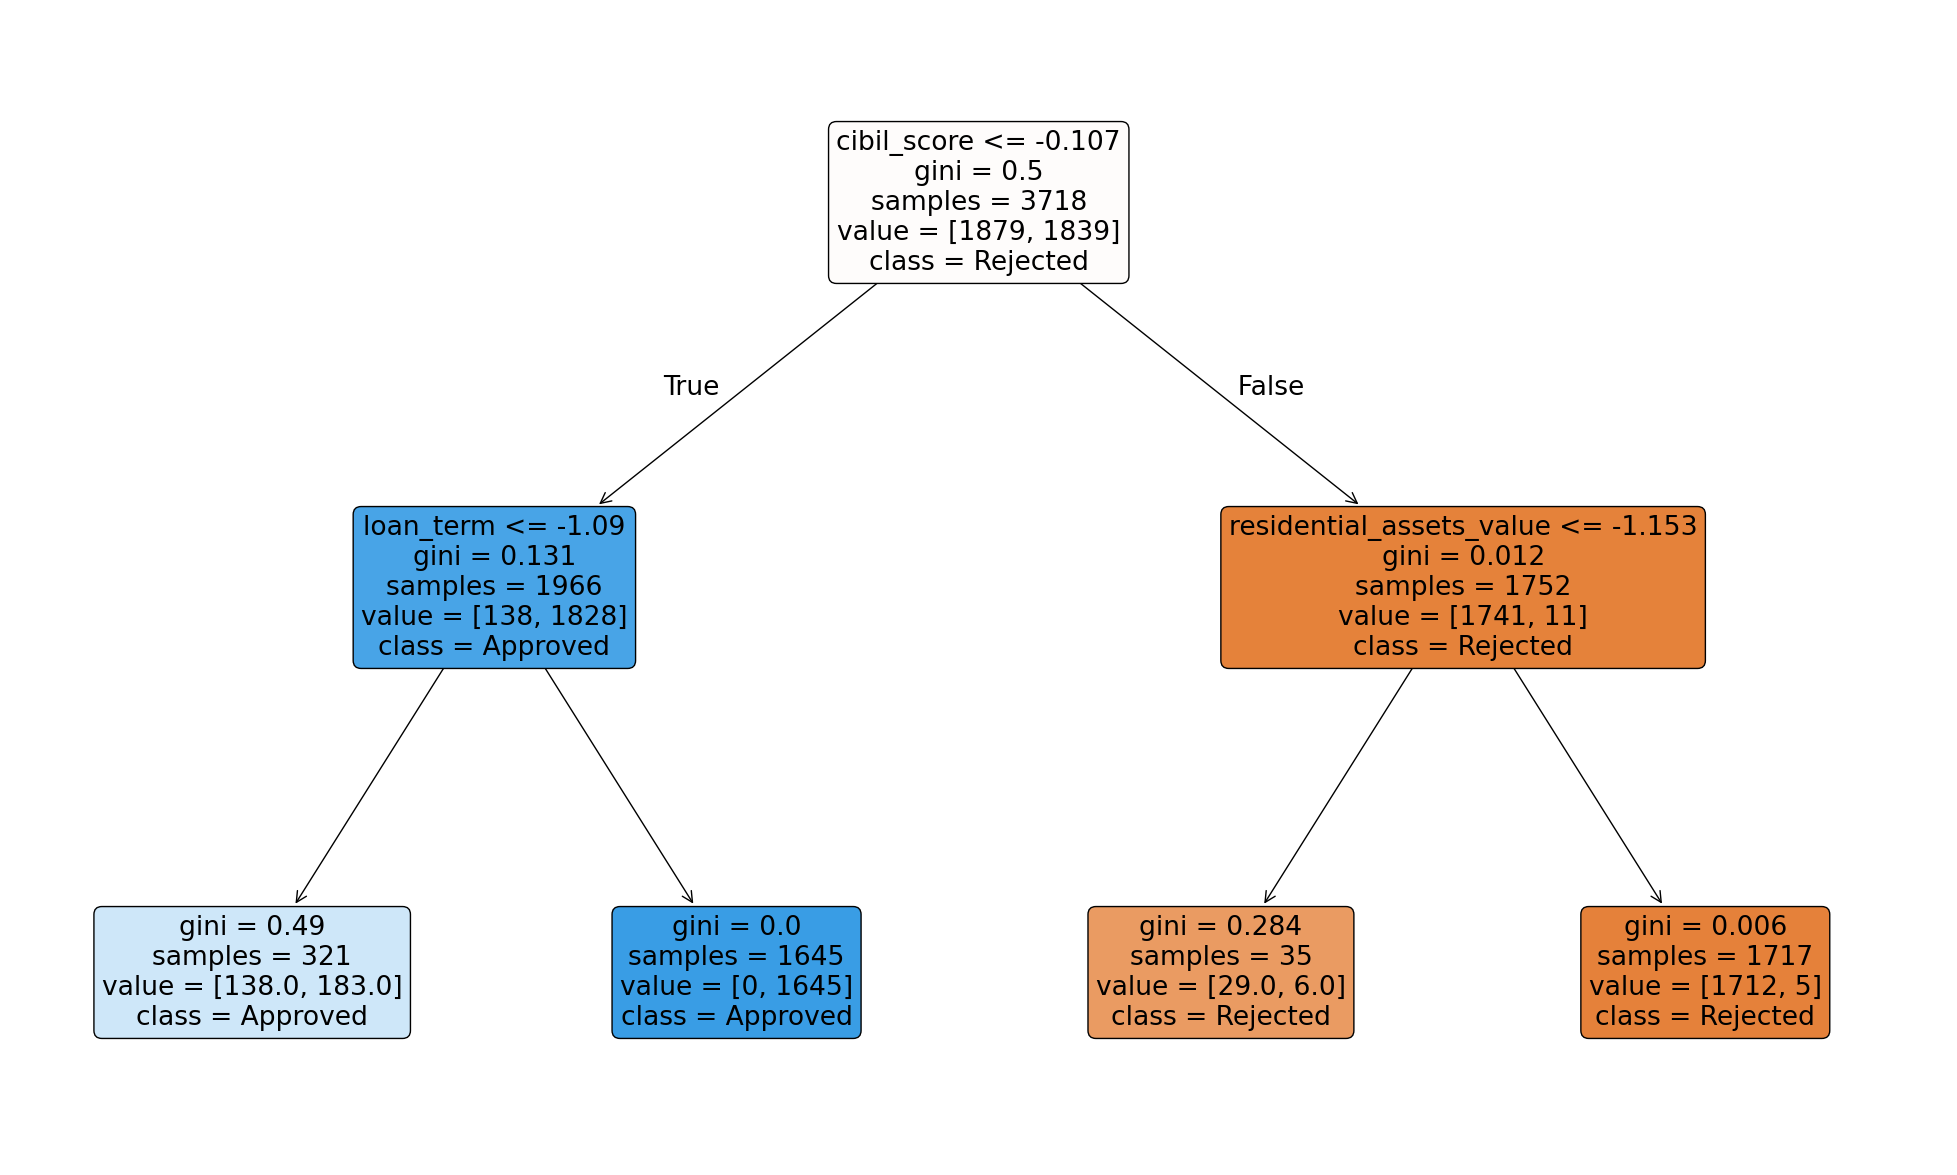

In [146]:
from sklearn.tree import plot_tree
feature_names = [
    "no_of_dependents",
    "education",
    "self_employed",
    "income_annum",
    "loan_amount",
    "loan_term",
    "cibil_score",
    "residential_assets_value",
    "commercial_assets_value",
    "luxury_assets_value",
    "bank_asset_value",
    "DTI"
]
plt.figure(figsize=(25, 15))
plot_tree(dt_model,
          filled=True,
          rounded=True,
          class_names=["Rejected", "Approved"],
          feature_names=feature_names)
plt.show()

In [147]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

log_params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ["lbfgs", "liblinear", "saga"],
    "penalty": ["l1", "l2", "elasticnet"],
    "l1_ratio": [0, 0.3, 0.5, 0.7, 1]
}


log_model = GridSearchCV(
    LogisticRegression(max_iter=500),
    log_params,
    cv=5,
    scoring="accuracy"
)

log_model.fit(X_train, y_train)

print("Best Logistic Regression Params:", log_model.best_params_)

log_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy with GridSearch:", accuracy_score(y_test, log_pred))


Best Logistic Regression Params: {'C': 0.001, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Accuracy with GridSearch: 0.9504391468005019


              precision    recall  f1-score   support

           0       0.99      0.91      0.95       777
           1       0.92      0.99      0.95       817

    accuracy                           0.95      1594
   macro avg       0.95      0.95      0.95      1594
weighted avg       0.95      0.95      0.95      1594



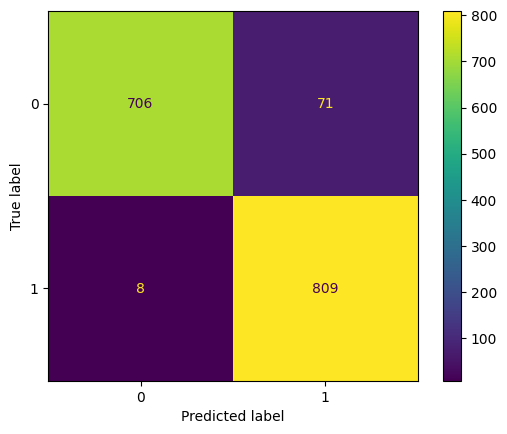

In [148]:
print(classification_report(y_test, log_pred))
cm=confusion_matrix(y_test,log_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [149]:
tree_params = {
 "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 8, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

tree_model = GridSearchCV(
    DecisionTreeClassifier(),
    tree_params,
    cv=5,
    scoring="accuracy"
)

tree_model.fit(X_train, y_train)

print("Best Decision Tree Params:", tree_model.best_params_)

tree_pred = tree_model.predict(X_test)
print("Decision Tree Accuracy with GridSearch:", accuracy_score(y_test, tree_pred))


Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy with GridSearch: 0.993099121706399


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       777
           1       1.00      0.99      0.99       817

    accuracy                           0.99      1594
   macro avg       0.99      0.99      0.99      1594
weighted avg       0.99      0.99      0.99      1594



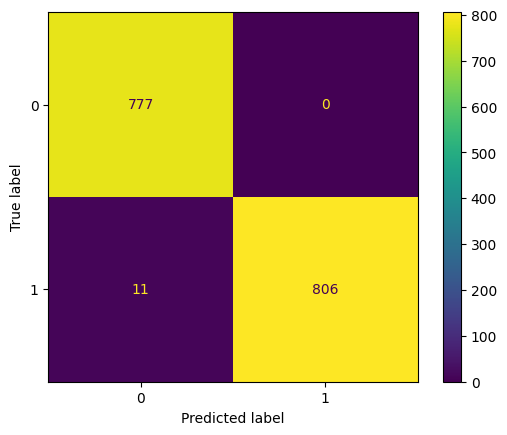

In [150]:
print(classification_report(y_test, tree_pred))
cm=confusion_matrix(y_test,tree_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=3, min_samples_leaf=4, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9698870765370138


              precision    recall  f1-score   support

           0       0.99      0.95      0.97       777
           1       0.96      0.99      0.97       817

    accuracy                           0.97      1594
   macro avg       0.97      0.97      0.97      1594
weighted avg       0.97      0.97      0.97      1594



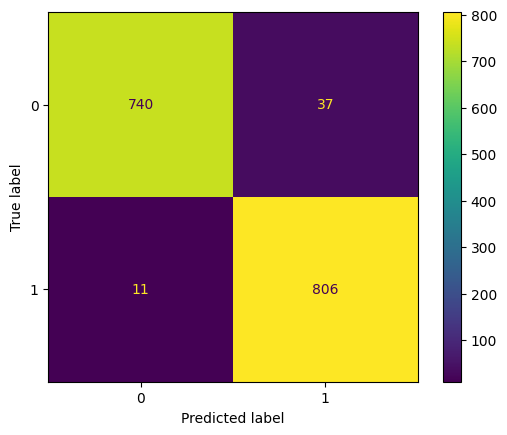

In [152]:
print(classification_report(y_test,y_pred_rf))
cm=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [153]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost Accuracy: 0.9874529485570891


In [154]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.946047678795483


In [155]:
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200,300],
    'max_depth': [None, 5, 10,15],
    'min_samples_split': [2, 5,7],
    'min_samples_leaf': [1, 2,3,5]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

y_pred_rf = rf_grid.predict(X_test)
print("Random Forest Best Params:", rf_grid.best_params_)
print("Random Forest Accuracy with GridSearch:", accuracy_score(y_test, y_pred_rf))

Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy with GridSearch: 0.9968632371392723


In [156]:
ada = AdaBoostClassifier(random_state=42)
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.5, 1.0, 1.5]
}

ada_grid = GridSearchCV(ada, ada_params, cv=5, scoring='accuracy', n_jobs=-1)
ada_grid.fit(X_train, y_train)

y_pred_ada = ada_grid.predict(X_test)
print("AdaBoost Best Params:", ada_grid.best_params_)
print("AdaBoost Accuracy With GridSearch:", accuracy_score(y_test, y_pred_ada))

AdaBoost Best Params: {'learning_rate': 1.0, 'n_estimators': 200}
AdaBoost Accuracy With GridSearch: 0.9905897114178168


In [157]:
svm = SVC(random_state=42)
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

y_pred_svm = svm_grid.predict(X_test)

print("Best SVM Parameters:", svm_grid.best_params_)
print("SVM Accuracy with GridSearch:", accuracy_score(y_test, y_pred_svm))

Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy with GridSearch: 0.9604767879548306


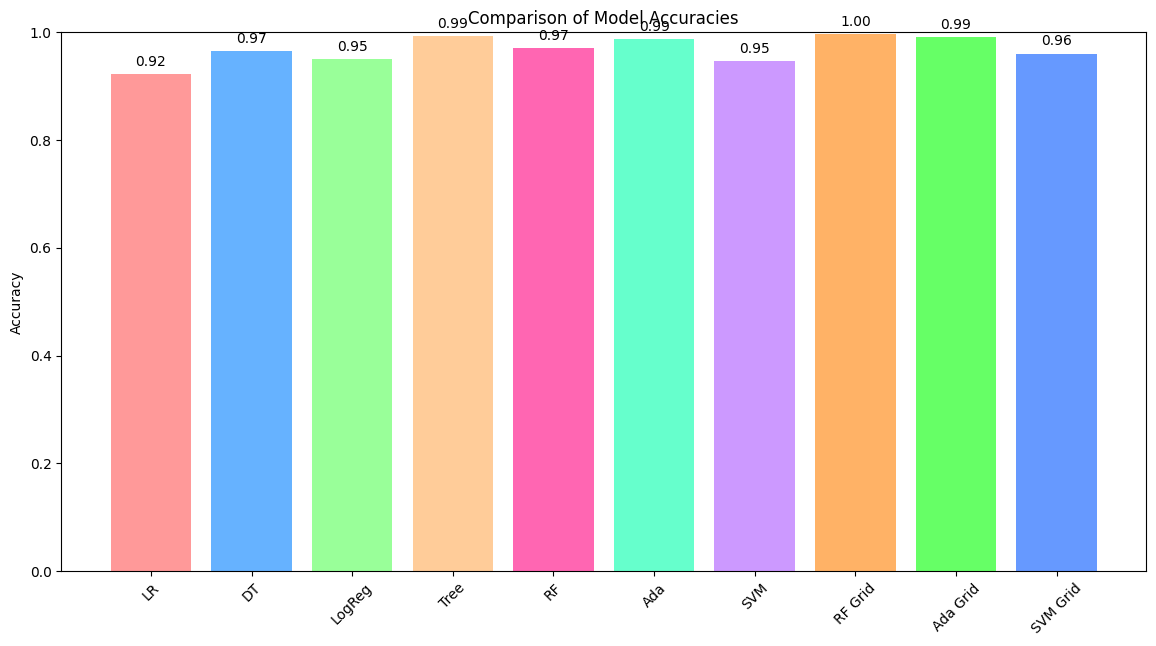

In [158]:
from sklearn.metrics import accuracy_score

models = [
    ("LR", lr_model_1),
    ("DT", dt_model),
    ("LogReg", log_model),
    ("Tree", tree_model),
    ("RF", rf_model),
    ("Ada", ada_model),
    ("SVM", svm_model),
    ("RF Grid", rf_grid),
    ("Ada Grid", ada_grid),
    ("SVM Grid", svm_grid)
]

accuracies = []
model_names = []

for name, model in models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    accuracies.append(acc)
    model_names.append(name)

colors = ['#FF9999','#66B2FF','#99FF99','#FFCC99','#FF66B2','#66FFCC','#CC99FF','#FFB266','#66FF66','#6699FF']

plt.figure(figsize=(14,7))
bars = plt.bar(model_names, accuracies, color=colors)
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45)

for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{acc:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()
